In [1]:
# to handle datasets
import pandas as pd
from pandas import DataFrame
import numpy as np

# handle simple warnings
# import warnings
# warnings.simplefilter(action='ignore')
# I want t see warnings


# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# to see all dataframe columns
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load dataset
ffmlDf = pd.read_csv('ffmlDf_20-21')

In [3]:
ffmlDf.head()
# use this to see if there are any columns that don't provide value
# index's do not provide value

,Unnamed: 0,points,minsPlayed,goalsScored,assists,cleanSheets,goalsConceded,ownGoals,penSaved,penMissed,yelCards,redCards,saves,bonus,bonusPointSystem,influence,creativity,threat,ictIndex,netTransfers,selectedBy,costGBP,gameDate,playerName,oppositionTeam
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,76656,7.0,2020-09-12,"('Mesut', 'Özil')",Fulham
1,6378,6,90,0,0,1,0,0,0,0,0,0,0,0,27,26.0,0.1,2.0,2.8,0,88657,5.0,2020-09-12,"('Federico', 'Fernández')",West Ham United
2,6394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,3326,4.5,2020-09-12,"('Ciaran', 'Clark')",West Ham United
3,6410,7,90,0,0,1,0,0,0,0,0,0,3,0,26,27.0,0.0,0.0,2.7,0,13715,5.0,2020-09-12,"('Karl', 'Darlow')",West Ham United
4,6426,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,27245,5.0,2020-09-12,"('Martin', 'Dubravka')",West Ham United


In [4]:
# drop 'unnamed: 0' as it is an index
ffmlDf = ffmlDf.drop(columns=['Unnamed: 0'])

In [5]:
ffmlDf.shape

(9685, 24)

In [6]:
# missing values
# if a column has one or more missing values within it
vars_with_na = [var for var in ffmlDf.columns if ffmlDf[var].isnull().sum() > 0]

ffmlDf[vars_with_na].isnull().mean()
# there are no null values

# to verify run:
# print(len(vars_with_na))

Series([], dtype: float64)

In [7]:
# what happens if I remove all data where mins played == 0

In [8]:
# remove zerominsplayed

def RemoveZeroMinsPlayed(df):
    df = df.copy().where(df['minsPlayed'] != 0)
    df.dropna(axis=0, inplace=True)
    return df

zero_mins_played = RemoveZeroMinsPlayed(ffmlDf)
zero_mins_played
# now repeat the actions to view the cont and disc distibutions

,points,minsPlayed,goalsScored,assists,cleanSheets,goalsConceded,ownGoals,penSaved,penMissed,yelCards,redCards,saves,bonus,bonusPointSystem,influence,creativity,threat,ictIndex,netTransfers,selectedBy,costGBP,gameDate,playerName,oppositionTeam
1,6.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,26.0,0.1,2.0,2.8,0.0,88657.0,5.0,2020-09-12,"('Federico', 'Fernández')",West Ham United
3,7.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,26.0,27.0,0.0,0.0,2.7,0.0,13715.0,5.0,2020-09-12,"('Karl', 'Darlow')",West Ham United
7,6.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.8,0.3,0.0,2.2,0.0,219489.0,4.5,2020-09-12,"('Jamaal', 'Lascelles')",West Ham United
11,5.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27.0,22.4,19.7,2.0,4.4,0.0,21964.0,4.5,2020-09-12,"('Javier', 'Manquillo')",West Ham United
16,2.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,12.8,2.0,0.0,1.5,0.0,5941.0,5.0,2020-09-12,"('Isaac', 'Hayden')",West Ham United
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9675,1.0,56.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3207.0,6.5,2021-01-04,"('Alex', 'Oxlade-Chamberlain')",Southampton
9676,0.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4288.0,6.5,2021-01-04,"('Xherdan', 'Shaqiri')",Southampton
9679,2.0,90.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,14.0,2.0,7.0,2.3,0.0,180668.0,5.5,2021-01-04,"('Jordan', 'Henderson')",Southampton
9680,2.0,90.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,15.8,23.0,35.0,7.4,0.0,120632.0,5.5,2021-01-04,"('Georginio', 'Wijnaldum')",Southampton


In [9]:
# move forward with zero mins played as the main df
# players who do not play a match offer no useful information
# for the model
ffmlDf = zero_mins_played

In [10]:
# group numerical variables

num_vars = [var for var in ffmlDf.columns if ffmlDf[var].dtypes != 'O']

print(len(num_vars),'out of',len(ffmlDf.columns),'are numerical variables')
num_vars

21 out of 24 are numerical variables


['points',
 'minsPlayed',
 'goalsScored',
 'assists',
 'cleanSheets',
 'goalsConceded',
 'ownGoals',
 'penSaved',
 'penMissed',
 'yelCards',
 'redCards',
 'saves',
 'bonus',
 'bonusPointSystem',
 'influence',
 'creativity',
 'threat',
 'ictIndex',
 'netTransfers',
 'selectedBy',
 'costGBP']

In [11]:
# separate discrete and continuous numerical variables for further analysis
# dicrete and continuous normally separated by unique values
for var in num_vars:
    print(var,':',ffmlDf[var].nunique())
    
# discrete_vars: variables that are counted
# continuous_vars: variables that are measured

points : 27
minsPlayed : 88
goalsScored : 5
assists : 5
cleanSheets : 2
goalsConceded : 8
ownGoals : 2
penSaved : 2
penMissed : 2
yelCards : 2
redCards : 2
saves : 11
bonus : 4
bonusPointSystem : 48
influence : 149
creativity : 149
threat : 53
ictIndex : 94
netTransfers : 110
selectedBy : 436
costGBP : 16


In [12]:
# get discrete vars

discrete_vars = [
    var for var in num_vars
    if ffmlDf[var].nunique() < 15 or var == 'minsPlayed'
]
discrete_vars

['minsPlayed',
 'goalsScored',
 'assists',
 'cleanSheets',
 'goalsConceded',
 'ownGoals',
 'penSaved',
 'penMissed',
 'yelCards',
 'redCards',
 'saves',
 'bonus']

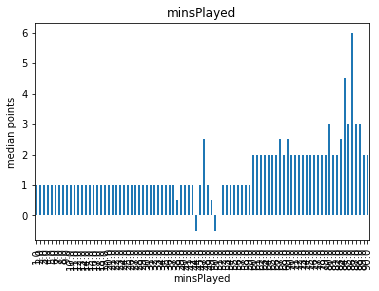

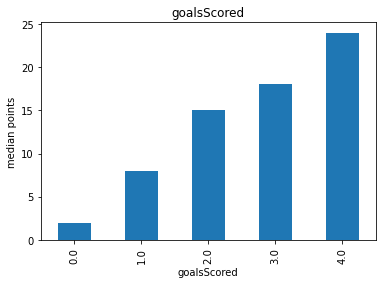

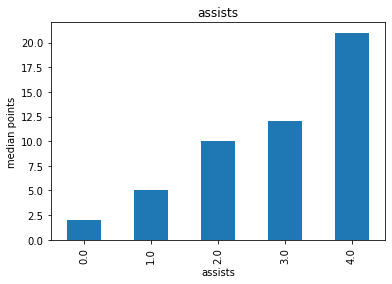

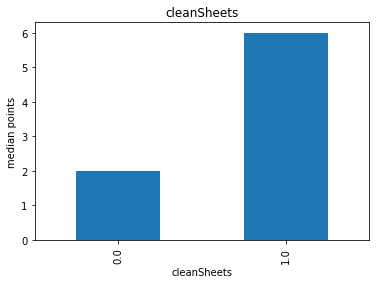

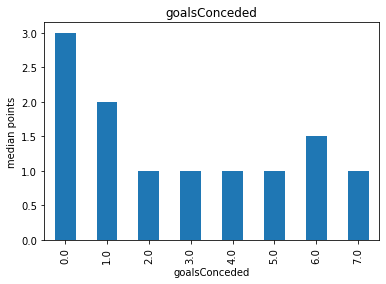

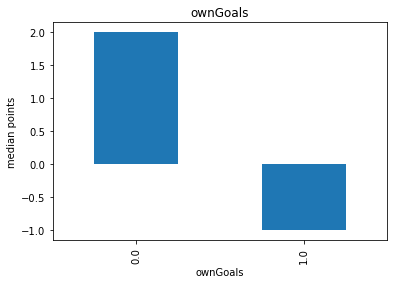

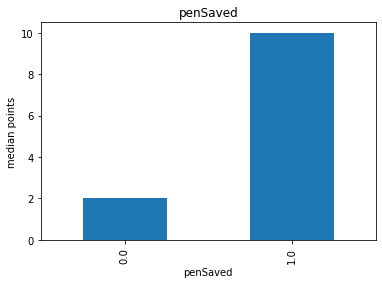

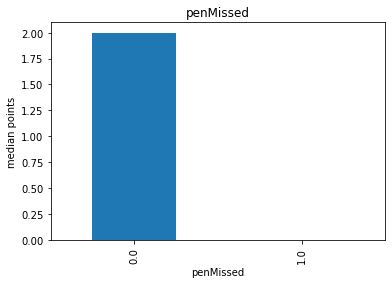

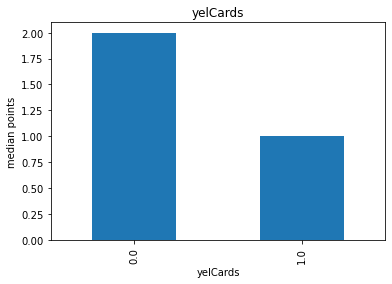

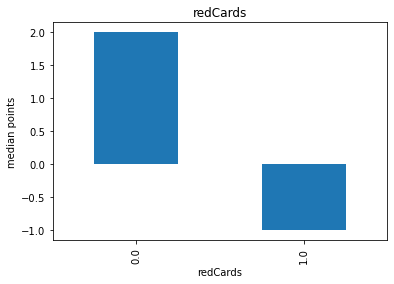

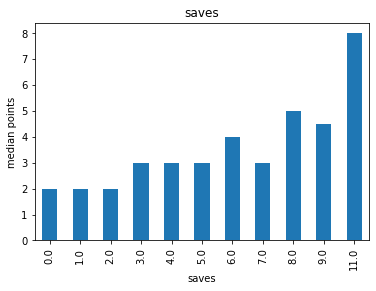

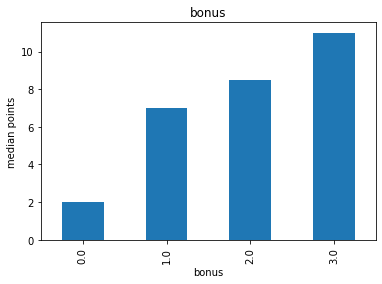

In [13]:
# plot num_vars as a bar (good for discrete)

def BarPlotNumVars(var, df):
    df = df.copy()
    df.groupby(var)['points'].median().plot.bar()
    plt.title(var)
    plt.ylabel('median points')
    plt.show()

for var in discrete_vars:
    BarPlotNumVars(var, ffmlDf)


In [14]:
# get continuous vars

continuous_vars = [
    var for var in num_vars
    if var not in discrete_vars
]
continuous_vars

['points',
 'bonusPointSystem',
 'influence',
 'creativity',
 'threat',
 'ictIndex',
 'netTransfers',
 'selectedBy',
 'costGBP']

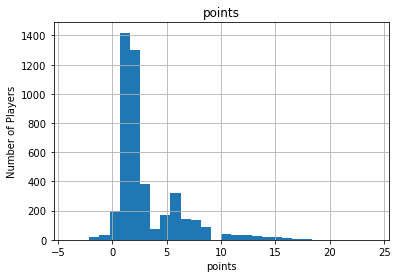

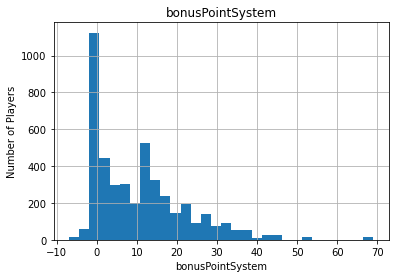

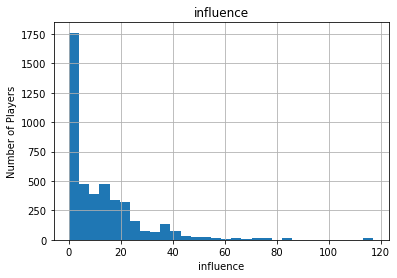

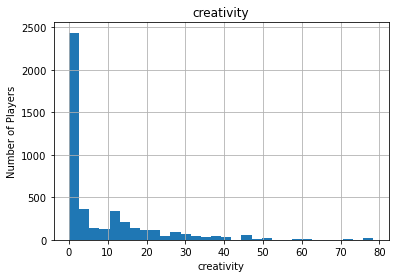

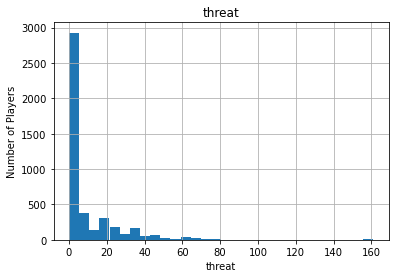

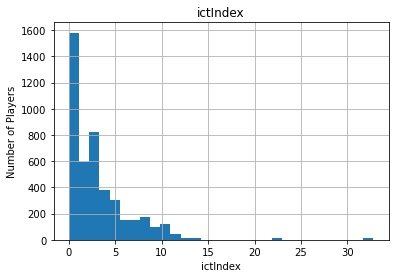

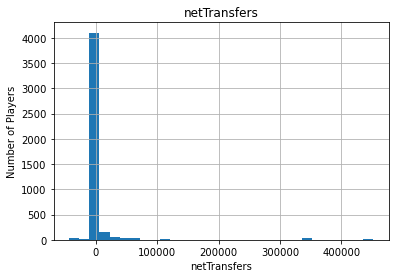

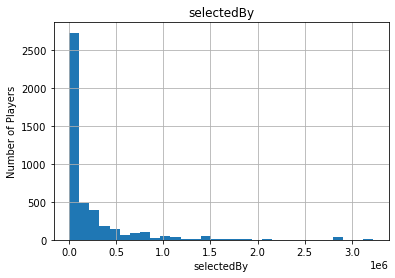

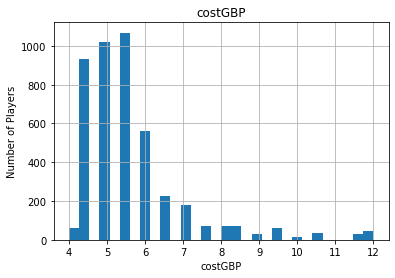

In [15]:
# plot num_vars as hist (good for continuous)

def HistPlotNumVars(var, df):
    df = df.copy()
    df[var].hist(bins=30)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Number of Players')
    plt.show()

for var in continuous_vars:
    HistPlotNumVars(var, ffmlDf)


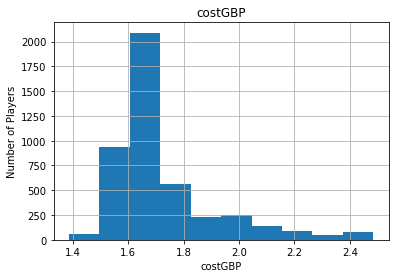

In [16]:
# if we transform the df do we get a more normal distribution
# for our histograms

def LogTranformContinuous(var, df):
    df = df.copy()
    
    # values <= 0 - cant be transformed
    if any(ffmlDf[var] <= 0):
        pass
    else:
        # log transform the var
        df[var] = np.log(df[var])
        df[var].hist(bins=10)
        plt.title(var)
        plt.xlabel(var)
        plt.ylabel('Number of Players')
        plt.show()

for var in continuous_vars:
    LogTranformContinuous(var, ffmlDf)


In [17]:
# didn't work out as I had hoped so let us not move forward
# with the transformed variables

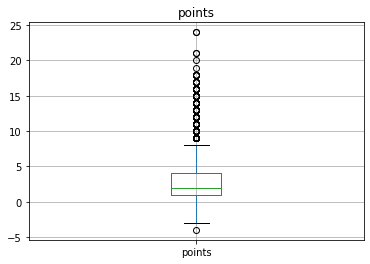

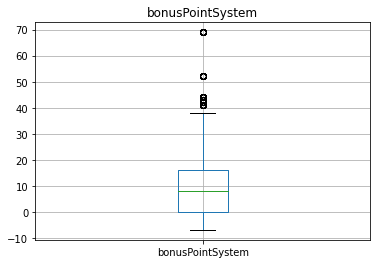

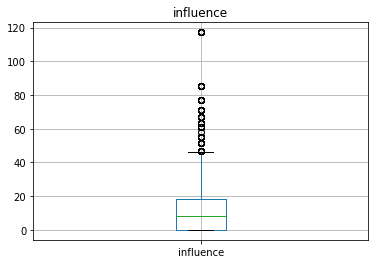

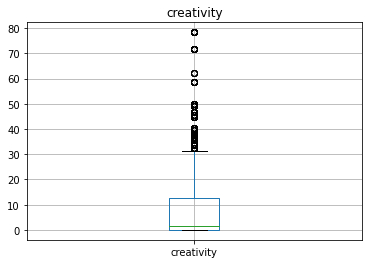

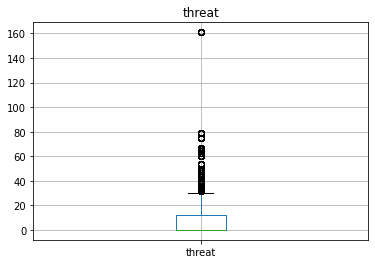

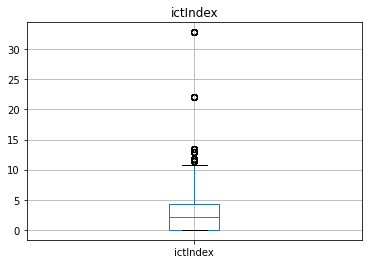

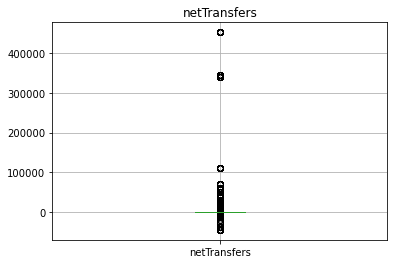

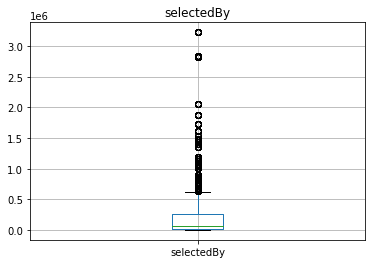

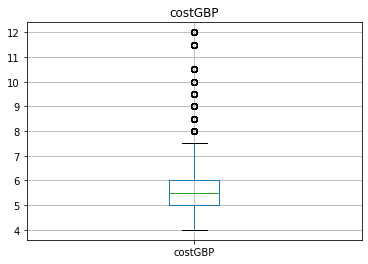

In [18]:
# outliers extreme values can affect the performance of linear models
# Boxplots let us spot outliers more easily

def BoxPlotContinuousVar(var, df):
    df = df.copy()
    df.boxplot(column=var)
    plt.title(var)
    plt.show()
    
for var in continuous_vars:
    BoxPlotContinuousVar(var, ffmlDf)


In [19]:
# it appears that players:
#     - performing well
#     - that are too expensive
# are outliers

In [20]:
ffmlDf.head()

,points,minsPlayed,goalsScored,assists,cleanSheets,goalsConceded,ownGoals,penSaved,penMissed,yelCards,redCards,saves,bonus,bonusPointSystem,influence,creativity,threat,ictIndex,netTransfers,selectedBy,costGBP,gameDate,playerName,oppositionTeam
1,6.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,26.0,0.1,2.0,2.8,0.0,88657.0,5.0,2020-09-12,"('Federico', 'Fernández')",West Ham United
3,7.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,26.0,27.0,0.0,0.0,2.7,0.0,13715.0,5.0,2020-09-12,"('Karl', 'Darlow')",West Ham United
7,6.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,21.8,0.3,0.0,2.2,0.0,219489.0,4.5,2020-09-12,"('Jamaal', 'Lascelles')",West Ham United
11,5.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,27.0,22.4,19.7,2.0,4.4,0.0,21964.0,4.5,2020-09-12,"('Javier', 'Manquillo')",West Ham United
16,2.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,12.0,12.8,2.0,0.0,1.5,0.0,5941.0,5.0,2020-09-12,"('Isaac', 'Hayden')",West Ham United


In [22]:
# plot the spread of points each player has gotten so far

def PlotPlayer(df, player):
    df = df.copy()
    df.groupby('playerName').plot.line(x='gameDate', y='points')
    plt.title(player)
    plt.show()


# couldnt seem to get the graphs to load in a scrollable format
# couldn't set the title to show for each graph
# best not to run this as i greatly increases the length and size
# of the jupyter notebook
for player in ffmlDf['playerName'].unique():
    #PlotPlayer(ffmlDf, player)
    break


In [23]:
# group the categorical variable
cat_vars = [
    var for var in ffmlDf.columns
    if ffmlDf[var].dtypes == 'O'
    ]

print(len(cat_vars),'out of',len(ffmlDf.columns),'are categorical variables')
cat_vars

3 out of 24 are categorical variables


['gameDate', 'playerName', 'oppositionTeam']

In [25]:
for var in cat_vars:
    print( var+': has', ffmlDf[var].nunique(), 'unique values')

gameDate: has 53 unique values
playerName: has 460 unique values
oppositionTeam: has 20 unique values


In [26]:
# the gameDate does not appear to offer any real value here
# so i will look to drop it
# oppositionTeam could help with predictions... maybe

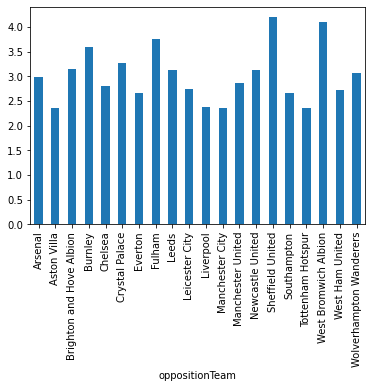

In [30]:
def OppTeamBarPlot(df):
    df = df.copy()
    df.groupby('oppositionTeam')['points'].mean().plot.bar()
    plt.show()

OppTeamBarPlot(ffmlDf)

In [ ]:
# the two worst teams in the prem have now been identified
# the next stage will be the feature engineering where we create
# the Test and Train datasets